In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [ ]:
stoplist  = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [ ]:
def data_processing(sub, field = "submission", info=False):
    file_name = "data/" + field + "_" + sub + ".csv"
    df = pd.read_csv(file_name,index_col=0)
    if info:
        print("subreddit : " + sub)
        print(df.describe())
        print(df.info())
    return df

In [ ]:
pol_df = data_processing("politics", field="comment")

In [ ]:
pol_df

,id,author,body,parent_id,score,subreddit,subreddit_id,submission_id
0,hynym3j,AutoModerator,"\nAs a reminder, this subreddit [is for civil ...",t3_t2suj2,1,politics,t5_2cneq,t2suj2
1,hyotmts,Lunar_Deer,Americans who support Putin can get fucked.,t3_t2suj2,7055,politics,t5_2cneq,t2suj2
2,hyo3bc6,workerbee77,Bob Mueller laid out the charges that Donald T...,t3_t2suj2,3709,politics,t5_2cneq,t2suj2
3,hyo265c,bobface222,He is almost correct,t3_t2suj2,15571,politics,t5_2cneq,t2suj2
4,hyoiog1,Jacob_C,I don't think people here understand the word ...,t3_t2suj2,1582,politics,t5_2cneq,t2suj2
...,...,...,...,...,...,...,...,...
1157,ijlfys8,TheCoelacanth,It was a criminal act for him to destroy recor...,t1_ijlbxeg,20,politics,t5_2cneq,wk0sxh
1158,ijlu0sa,evil_newton,"That’s all very well, but irrelevant if he did...",t1_ijlhc7a,9,politics,t5_2cneq,wk0sxh
1159,ijlu5jf,juliet_in_yoga_pants,"Good point, llamaface.",t1_ijlu1nz,9,politics,t5_2cneq,wk0sxh
1160,ijlcy7s,Johnny_Appleweed,They’ve apparently been dating for 5 years. Th...,t1_ijlbqkz,47,politics,t5_2cneq,wk0sxh


In [ ]:
raw_text = pol_df["body"].to_list()

In [ ]:
type(raw_text[2])

str

In [ ]:
tgt_txt = []
vocab = set()
for text in raw_text:
    try:
        segment = text.split()
        segment_text = []
        for token in segment:
            word = re.sub('[^a-zA-Z]+', '', token).lower()
            word = stemmer.stem(word)
            if word:
                if word not in stop_words:
                    vocab.add(word)
                    segment_text.append(word)
        tgt_txt.append(segment_text)
    except:
        pass
vocab = {b: a for a, b in enumerate(set(vocab))}

In [ ]:
tgt_list = []
for sent in tgt_txt:
    text = ' '.join(sent)
    tgt_list.append(text)

In [ ]:
full_text = ' '.join(tgt_list)

In [ ]:
stopwords = set(STOPWORDS)


In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(full_text)

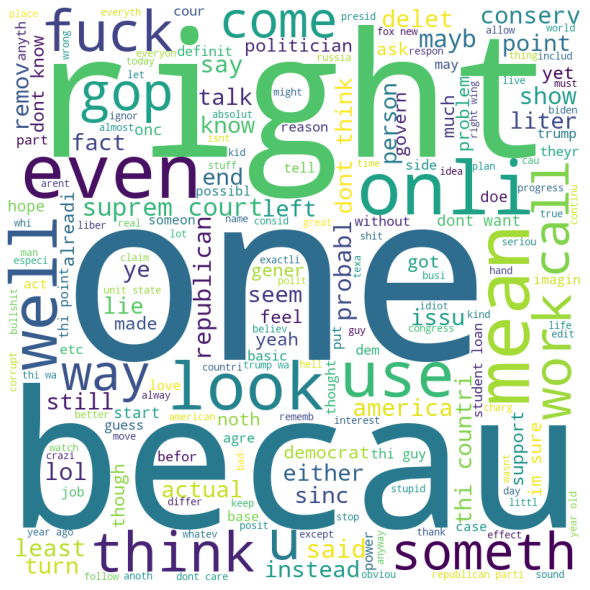

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()